# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


In [2]:
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    #print(lat_lng)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
Cloud=[]
Country=[]
Date=[] 
Humidity =[]    
Lat=[]
Lng=[]   
Max_Temp=[]
Wind_Speed=[]
citiesNotFound=[]

   

In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval\n-----------------------------")
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]
Sets = list(chunks(cities, 50))
for set in Sets:
    for x in range(0,len(set)):  
        try:
            response = requests.get(base_url +"appid=" + api_key+ "&q=" + set[x] +"&units=imperial").json()
            print("Processing Record {} of Set {} | {}".format(x if Sets.index(set) > 0 else x+1, Sets.index(set)+1, set[x]))
            Cloud.append(response["clouds"]["all"])
            Country.append(response["sys"]["country"])
            Date.append(response["dt"])
            Humidity.append(response["main"]["humidity"])
            Lat.append(response["coord"]["lat"])
            Lng.append(response["coord"]["lon"])
            Max_Temp.append(response["main"]["temp_max"])
            Wind_Speed.append(response["wind"]["speed"])
        except:
            print("City not found. Skipping...")
            cities.remove(set[x])
            citiesNotFound.append(set[x])
            
        
        
print("-----------------------------\nData Retrieval Complete\n-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | suruc
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | itaituba
Processing Record 14 of Set 1 | tautira
Processing Record 15 of Set 1 | kholm-zhirkovskiy
Processing Record 16 of Set 1 | porto velho
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | zhob
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | ho

Processing Record 35 of Set 4 | clyde river
Processing Record 36 of Set 4 | muravlenko
Processing Record 37 of Set 4 | salalah
Processing Record 38 of Set 4 | codrington
Processing Record 39 of Set 4 | honiara
Processing Record 40 of Set 4 | bonavista
Processing Record 41 of Set 4 | gilbues
Processing Record 42 of Set 4 | dingle
Processing Record 43 of Set 4 | grand gaube
Processing Record 44 of Set 4 | natal
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | abu jubayhah
City not found. Skipping...
Processing Record 47 of Set 4 | gat
Processing Record 48 of Set 4 | kibondo
Processing Record 49 of Set 4 | nicoya
Processing Record 0 of Set 5 | novaya ladoga
Processing Record 1 of Set 5 | swellendam
Processing Record 2 of Set 5 | emirdag
Processing Record 3 of Set 5 | amapa
Processing Record 4 of Set 5 | inhambane
Processing Record 5 of Set 5 | simao
Processing Record 6 of Set 5 | huambo
Processing Record 7 of Set 5 | inuvik
Processing Record 8 of Set 5 | belu

Processing Record 24 of Set 8 | kikerino
Processing Record 25 of Set 8 | salvador
Processing Record 26 of Set 8 | at-bashi
Processing Record 27 of Set 8 | georgetown
Processing Record 28 of Set 8 | chernyshevskiy
Processing Record 29 of Set 8 | mardin
Processing Record 30 of Set 8 | tromso
Processing Record 31 of Set 8 | mahibadhoo
Processing Record 32 of Set 8 | espanola
Processing Record 33 of Set 8 | uchaly
Processing Record 34 of Set 8 | ruwi
Processing Record 35 of Set 8 | guarapari
Processing Record 36 of Set 8 | qaqortoq
Processing Record 37 of Set 8 | iberia
Processing Record 38 of Set 8 | glendive
Processing Record 39 of Set 8 | binga
Processing Record 40 of Set 8 | acapulco
Processing Record 41 of Set 8 | coquimbo
Processing Record 42 of Set 8 | treinta y tres
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | hwange
Processing Record 45 of Set 8 | puntarenas
Processing Record 46 of Set 8 | longonjo
Processing Record 47 of Set 8 | nong bua
Processing Reco

Processing Record 10 of Set 12 | garoua
Processing Record 11 of Set 12 | ambon
Processing Record 12 of Set 12 | sorland
Processing Record 13 of Set 12 | lata
Processing Record 14 of Set 12 | alyangula
Processing Record 15 of Set 12 | makakilo city
Processing Record 16 of Set 12 | bhuj
Processing Record 17 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 18 of Set 12 | kenai
Processing Record 19 of Set 12 | owensboro
Processing Record 20 of Set 12 | houma
Processing Record 21 of Set 12 | mayumba
Processing Record 22 of Set 12 | deshna
City not found. Skipping...
Processing Record 23 of Set 12 | marawi
Processing Record 24 of Set 12 | tiarei
Processing Record 25 of Set 12 | kumbo
Processing Record 26 of Set 12 | chiang rai
Processing Record 27 of Set 12 | richards bay
Processing Record 28 of Set 12 | lukow
Processing Record 29 of Set 12 | udachnyy
Processing Record 30 of Set 12 | igrim
Processing Record 31 of Set 12 | chapais
Processing Record 32 of Set 12 | medea
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
City_Dict ={"City":cities,"Cloudiness":Cloud, "Country":Country, "Date":Date,"Humidity":Humidity, "Lat":Lat,"Lng":Lng,"Max Temp":Max_Temp,"Wind Speed":Wind_Speed }
Citi_Data = pd.DataFrame(City_Dict)
Citi_Data.count()



City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [7]:
Citi_Data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,provideniya,90,RU,1561414431,75,64.42,-173.23,46.40,8.95
1,torbay,40,CA,1561414455,63,47.66,-52.73,60.80,6.93
2,punta arenas,20,CL,1561414873,80,-53.16,-70.91,33.80,19.46
3,suruc,0,TR,1561414873,36,36.98,38.42,81.00,6.93
4,bluff,0,AU,1561414756,63,-23.58,149.07,49.91,7.23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

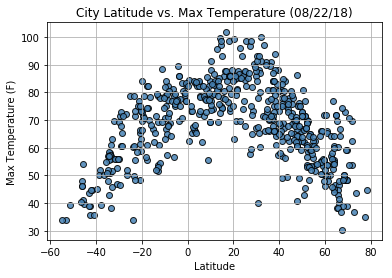

In [8]:
x= Citi_Data["Lat"]
y = Citi_Data["Max Temp"]
plt.scatter(x,y,marker ='o',c='steelblue', alpha =0.85,edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.grid()


#### Latitude vs. Humidity Plot

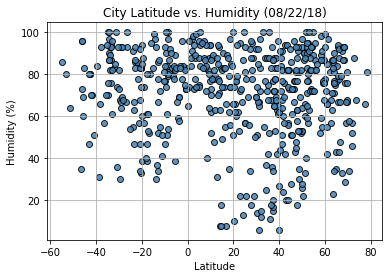

In [9]:
x= Citi_Data["Lat"]
y = Citi_Data["Humidity"]
plt.scatter(x,y,marker ='o',c='steelblue', alpha =0.85,edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.grid()

#### Latitude vs. Cloudiness Plot

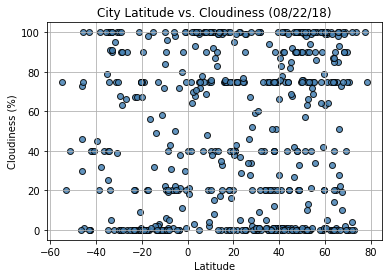

In [10]:
x= Citi_Data["Lat"]
y = Citi_Data["Cloudiness"]
plt.scatter(x,y,marker ='o',c='steelblue', alpha =0.85,edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.grid()

#### Latitude vs. Wind Speed Plot

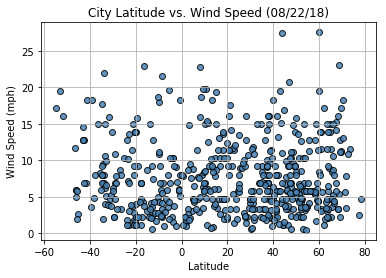

In [11]:
x= Citi_Data["Lat"]
y = Citi_Data["Wind Speed"]
plt.scatter(x,y,marker ='o',c='steelblue', alpha =0.85,edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.grid()